In [ ]:
## assignment - 
# https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [17]:
import pandas as pd
import numpy as np

In [18]:
reviews = pd.read_csv("IMDB Dataset.csv")

In [19]:
reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [20]:
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [21]:
reviews.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [22]:
reviews.shape

(50000, 2)

In [23]:
import re
from nltk.corpus import stopwords

# Get the English stop words
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    This function cleans the input text by performing the following steps:
    1. Removes HTML tags.
    2. Removes punctuation and special characters.
    3. Converts text to lowercase.
    4. Tokenizes the text and removes stopwords.
    """
    
    # 1. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # 2. Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    
    # 3. Convert to lowercase
    text = text.lower()
    
    # 4. Remove stopwords
    # Tokenize the text and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Apply the cleaning function to the 'review' column
reviews['cleaned_review'] = reviews['review'].apply(clean_text)

print("Original Review:")
print(reviews['review'][0])
print("\nCleaned Review:")
print(reviews['cleaned_review'][0])

Original Review:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show 

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X = tfidf_vectorizer.fit_transform(reviews['cleaned_review']).toarray()

y = reviews['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

print("Shape of TF-IDF features (X):", X.shape)
print("Shape of target variable (y):", y.shape)





Shape of TF-IDF features (X): (50000, 5000)
Shape of target variable (y): (50000,)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


Accuracy: 0.8869


Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.87      0.88      4961
    Positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Confusion Matrix:
[[4328  633]
 [ 498 4541]]


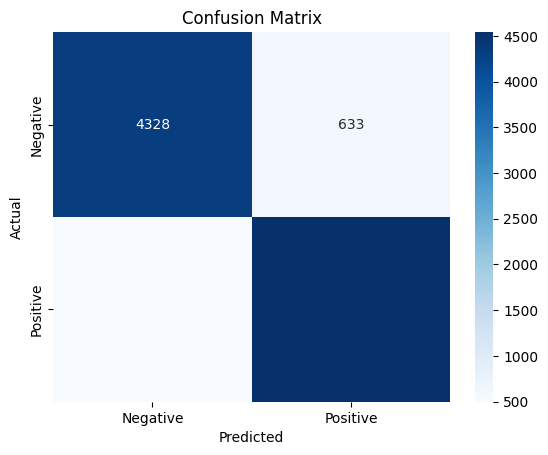

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# --- Accuracy Score ---
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\n" + "="*50 + "\n")

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
print("\n" + "="*50 + "\n")

# --- Confusion Matrix ---
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# For a better visualization of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
def predict_sentiment(review):
    # 1. Clean the review text
    cleaned_review = clean_text(review)
    
    # 2. Vectorize the cleaned text using the SAME TF-IDF vectorizer
    review_vector = tfidf_vectorizer.transform([cleaned_review]).toarray()
    
    # 3. Predict using the trained model
    prediction = log_reg_model.predict(review_vector)
    
    # 4. Return the sentiment
    return "Positive" if prediction[0] == 1 else "Negative"

In [28]:
# Example Usage:
new_review_1 = "This movie is quite amazing."
print(f"Review: '{new_review_1}'")
print(f"Predicted Sentiment: {predict_sentiment(new_review_1)}")

new_review_2 = "A complete waste of time. The movie was boring and predictable."
print(f"\nReview: '{new_review_2}'")
print(f"Predicted Sentiment: {predict_sentiment(new_review_2)}")

Review: 'This movie is quite amazing.'
Predicted Sentiment: Positive

Review: 'A complete waste of time. The movie was boring and predictable.'
Predicted Sentiment: Negative


In [29]:
import joblib

# Save the vectorizer and the model
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(log_reg_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [ ]:
## preprocessing